In [1]:
import numpy as np
import PIL.Image as Im
import matplotlib.pyplot as plt
import math
import scipy as sp

In [2]:
import matlab.engine
eng = matlab.engine.start_matlab()

mean: 77.0 guess: 50


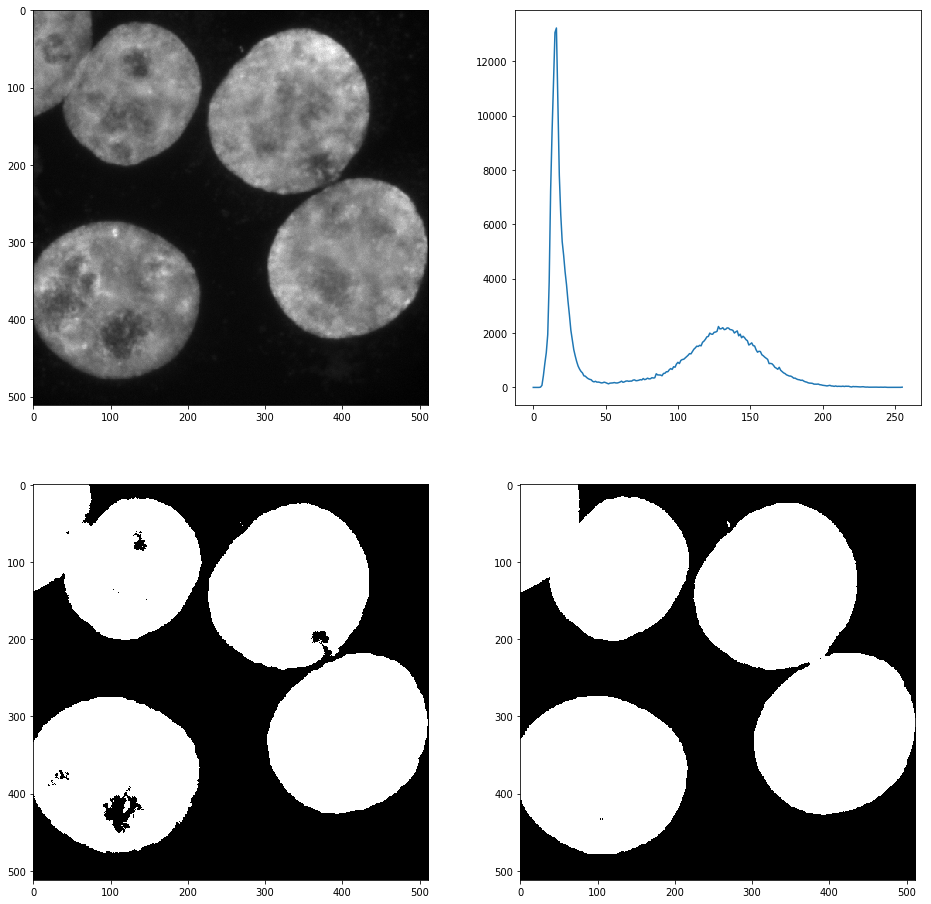

In [3]:
im = np.array(Im.open('lab4files/cells.tif'))
histo = eng.hist(matlab.double(im.flatten().tolist()), matlab.double(list(range(256))))
t = np.mean(im)
t_bad = 5

tmid = eng.mid_way(histo[0], float(t))
im_tmid = im > tmid

tmid_bad = eng.mid_way(histo[0], float(t_bad))
tmid_bad = 50
print("mean:", tmid, "guess:", tmid_bad)
im_tmid_bad = im > tmid_bad

plt.figure(
figsize=(16,16))
plt.subplot(221)
plt.imshow(im, cmap='gray')

plt.subplot(222)
plt.plot(range(256), histo[0]);

plt.subplot(223)
plt.imshow(im_tmid, cmap='gray', vmax=1, vmin=0)

plt.subplot(224)
plt.imshow(im_tmid_bad, cmap="gray", vmin=0, vmax=1)

## Question 1
It is the mean value of the image

## Question 2
It is not very sensitive, we could not find a value for t that made the result different

## Question 3
50 perhaps, as can be seen in the lower right

## Question 4
The next t is where the two gausian functions cross

## Question 5
The mean is calculated by taking the mean of the lower and the upper part of the histogram.

In [4]:
def my_0(p, t):
    res = 0
    for x in range(t):
        res += p[x] * x
    return res / sum(p[:t])

def my_1(p, t):
    res = 0
    for x in range(t-1, len(p)):
        res += p[x] * x
    return res / sum(p[t:])

total = sum(histo[0])
p = np.array(histo[0]) / total

def total_prob(p, t):
    return sum(p[0:int(round(t))] / sum(p))

## Question 6
See above for python code on how to calculate total probability for lower part of histogram

In [5]:
def sigma_squared_0(p, t, my0):
    res = 0
    
    for x in range(t):
        res += p[x] * (x-my0)**2
    #print(res)
    return res / sum(p[:t])
    #return np.std(p[:t])

def sigma_squared_1(p, t, my1):
    res = 0
    for x in range(t, len(p)):
        res += p[x] * (x-my1)**2
    return res / sum(p[t:])

## Question 7
See above for python code on how to calculate the sigma squared for lower part of histogram

In [159]:
def gaussian(sigma, my, t):
    return (1/ (math.sqrt(sigma * 2 * math.pi))) * \
            math.exp(-1/2.0 * ((t - my)**2/sigma))

def least_error(histo, start_t):
    p = np.array(histo) / np.sum(histo)
    num = len(p)
    t = math.floor(start_t)
    last_t = t+1
    last_last_t = t+2
    
    while abs(last_t - t) > 0.5 and last_last_t != t:
        #t0 = t1
        
        P0 = total_prob(p, t)
        P1 = 1-P0
        
        m0 = my_0(p, t)
        m1 = my_1(p, t)
        
        sigma_0 = sigma_squared_0(p, t, m0)
        sigma_1 = sigma_squared_1(p, t, m1)
        
        #print(P0, P1, m0, m1, sigma_0, sigma_1)
        p0 = gaussian(sigma_0, m0, t)
        p1 = gaussian(sigma_1, m1, t)
        #print('{}, {}, {}, {}, {}, {}, {}, {}'.format(P0, P1, m0, m1, sigma_0, sigma_1, p0, p1))
        
        
        a = 1/((sigma_1 - sigma_0)/(sigma_0*sigma_1))
        b = 2*(-m0/sigma_0 + m1/sigma_1)
        c = -2*np.log(P0/P1) + np.log(sigma_0/sigma_1) + (m0**2)/sigma_0 - (m1**2)/sigma_1
        
        #print(a, b, c)
        r1 = -(a*b)/2 + np.sqrt((a*b/2)**2 - a*c)
        r2 = -(a*b)/2 - np.sqrt((a*b/2)**2 - a*c)
        
        last_last_t = last_t
        last_t = t
        if abs(r1 - t) < abs(r2 - t):
            t = r1
        else:
            t = r2
        
        #print('roots: {}, {}'.format(r1, r2))
        t = int(round(t)) 
        
        
    return t

print(gaussian(1, 0, 0))

0.3989422804014327


35


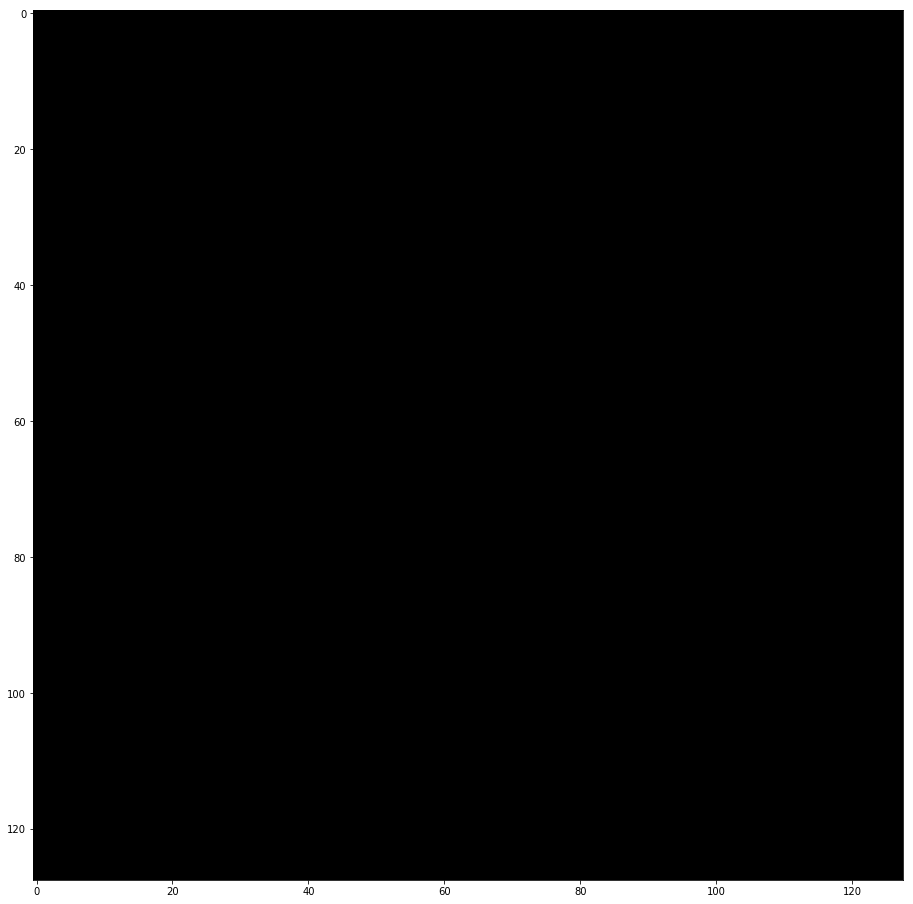

In [160]:
t = least_error(histo[0], 77)
plt.figure(figsize=(16,16))
im_le = im > t
plt.imshow(im_le, cmap='gray')
print(t)

## Question 8
$threshold = 35$

Quality is good, but some noise on the outside

109.4591064453125
88.0
79


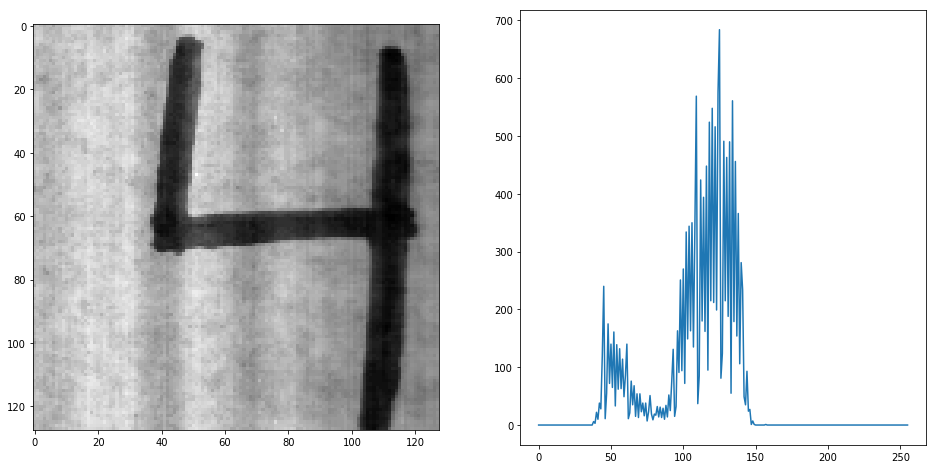

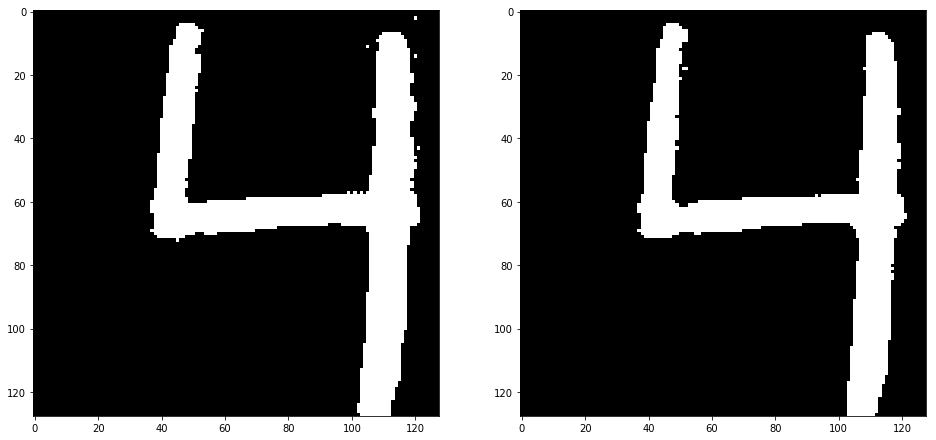

In [161]:
im_nuf = np.array(Im.open('lab4files/nuf4a.tif'))
hist_nuf = eng.hist(matlab.double(im_nuf.flatten().tolist()), matlab.double(list(range(256))))

plt.figure(figsize=(16,8))
plt.subplot(121)
plt.imshow(im_nuf, cmap='gray')

plt.subplot(122)
plt.plot(range(256), hist_nuf[0]);

t = np.mean(im_nuf)
print(t)
tmid = eng.mid_way(hist_nuf[0], float(t))
print(tmid)
plt.figure(figsize=(16,8))
plt.subplot(121)
im_m = im_nuf <= tmid
plt.imshow(im_m, cmap="gray", vmin=0, vmax=1)

plt.subplot(122)
t = least_error(hist_nuf[0], tmid)
im_le = im_nuf <= t
plt.imshow(im_le, cmap="gray", vmin=0, vmax=1)

print(t)

## Question 9
$midway = 88$, $least\_error = 79$

Least error is slightly better (more noise in midway)

179.10321044921875
201.0
245


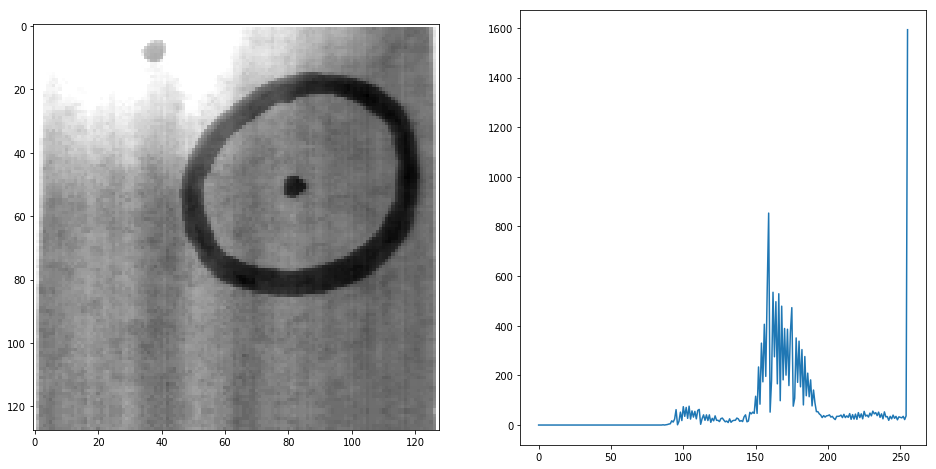

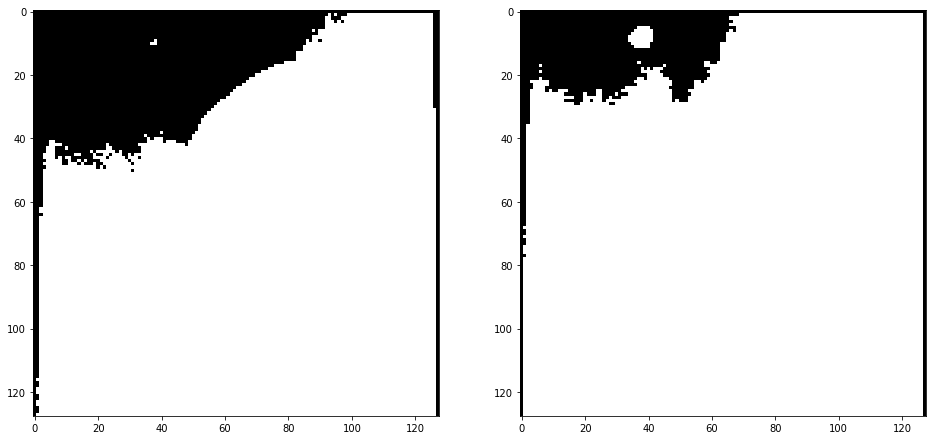

In [162]:
im_nuf = np.array(Im.open('lab4files/nuf0b.tif'))
hist_nuf = eng.hist(matlab.double(im_nuf.flatten().tolist()), matlab.double(list(range(256))))

plt.figure(figsize=(16,8))
plt.subplot(121)
plt.imshow(im_nuf, cmap='gray')

plt.subplot(122)
plt.plot(range(256), hist_nuf[0]);

t = np.mean(im_nuf)
print(t)
tmid = eng.mid_way(hist_nuf[0], float(t))
print(tmid)
plt.figure(figsize=(16,8))
plt.subplot(121)
im_m = im_nuf <= tmid
plt.imshow(im_m, cmap="gray", vmin=0, vmax=1)

plt.subplot(122)
t = least_error(hist_nuf[0], tmid)
im_le = im_nuf <= t
plt.imshow(im_le, cmap="gray", vmin=0, vmax=1)

print(t)

## Question 10
The image has no clear distinctions between the background and foreground because of the light spot

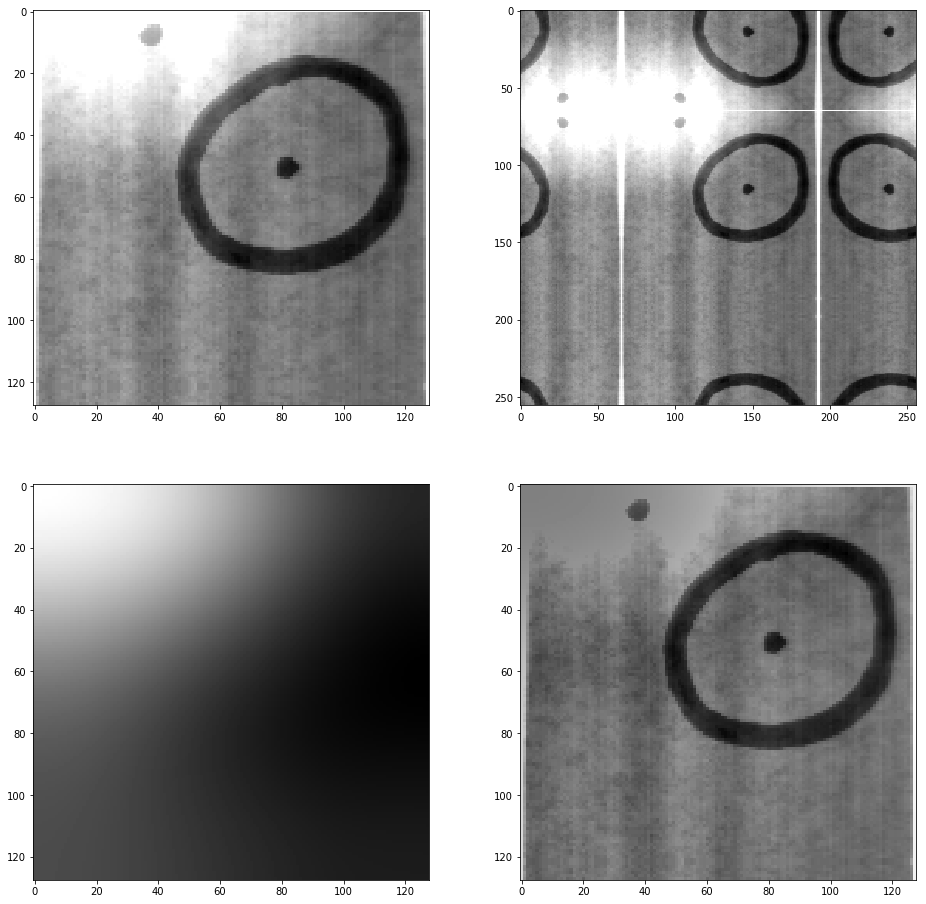

In [163]:
import scipy.signal
im_nuf = np.array(Im.open('lab4files/nuf0b.tif'))

def local_tresh(im, sigma, debug=False):
    tmp = np.concatenate((im[:, 65:0:-1], im, im[:, 129:64:-1]), axis=1)
    imextend = np.concatenate((tmp[65:0:-1, :], tmp, tmp[129:64:-1, :]))

    lpH = np.exp(-0.5 * (np.array(range(-64,65))/sigma)**2)
    lpH = lpH/np.sum(lpH)
    lpH2 = lpH.reshape(129,-1)
    lpV2 = lpH2.transpose()

    imblur = sp.signal.convolve2d(imextend, lpH2, 'valid')
    imblur = sp.signal.convolve2d(imblur, lpV2, 'valid')


    newim = im - imblur + 128
    if debug:
        return imextend, imblur, newim
    else:
        return newim

plt.figure(figsize=(16,16))
plt.subplot(221)
plt.imshow(im_nuf, cmap='gray')

nufextend, nufblur, newnuf = local_tresh(im_nuf, 25, True)

plt.subplot(222)
plt.imshow(nufextend, cmap='gray')

plt.subplot(223)
plt.imshow(nufblur, cmap='gray')

plt.subplot(224)
plt.imshow(newnuf, cmap='gray')


## Question 11
We have big filters, there would be a lot of zeroes without any padding.

## Question 12
Don't really understand the question, if we used $sigma = 0.1$ the object(circle?) dissapears

127.7445463196729
107.0
88


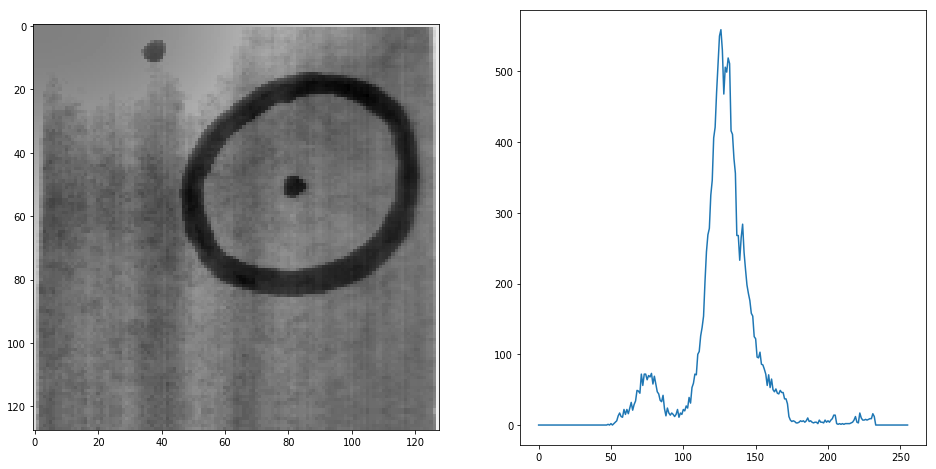

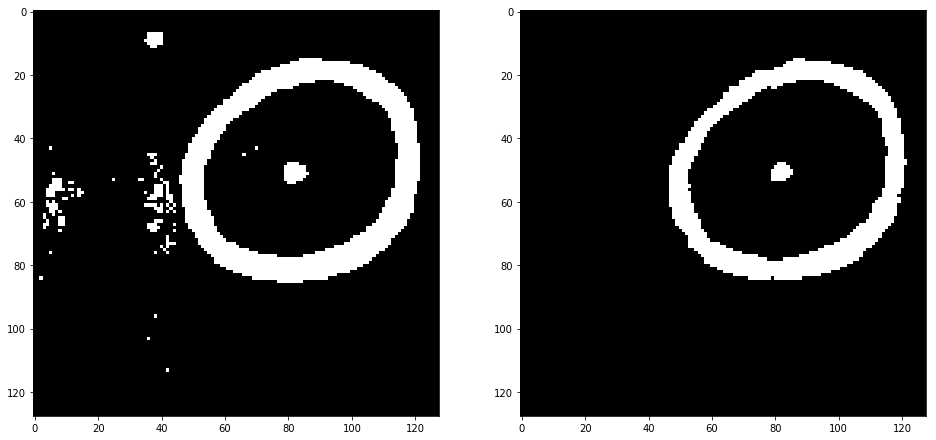

In [164]:
hist_nuf = eng.hist(matlab.double(newnuf.flatten().tolist()), matlab.double(list(range(256))))

plt.figure(figsize=(16,8))
plt.subplot(121)
plt.imshow(newnuf, cmap='gray')

plt.subplot(122)
plt.plot(range(256), hist_nuf[0]);

t = np.mean(newnuf)
print(t)
tmid = eng.mid_way(hist_nuf[0], float(t))
print(tmid)
plt.figure(figsize=(16,8))
plt.subplot(121)
im_m = newnuf <= tmid
plt.imshow(im_m, cmap="gray", vmin=0, vmax=1)

plt.subplot(122)
t = least_error(hist_nuf[0], tmid)
im_le = newnuf <= t
plt.imshow(im_le, cmap="gray", vmin=0, vmax=1)

print(t)

In [235]:
SE8 = np.array(((1,1,1), (1,1,1), (1,1,1)))
SE4 = np.array(((0,1,0), (1,1,1), (0,1,0)))
def dilate_oct(im, iterations):
    im_doct = scipy.ndimage.binary_dilation(im, SE4, iterations=iterations)
    im_doct = scipy.ndimage.binary_dilation(im_doct, SE8, iterations=iterations)
    return im_doct

def erode_oct(im, iterations):
    im_doct = scipy.ndimage.binary_erosion(im, SE4, iterations=iterations)
    im_doct = scipy.ndimage.binary_erosion(im_doct, SE8, iterations=iterations)
    return im_doct

def open_im(im, iterations):
    im_out = im
    for i in range(iterations):
        im_out = erode_oct(im_out, 1)
        im_out = dilate_oct(im_out, 1)
    return im_out

def close_im(im, iterations):
    im_out = im
    for i in range(iterations):
        im_out = dilate_oct(im_out, 1)
        im_out = erode_oct(im_out, 1)
    return im_out


def tresh_skeletonize(im, debug=False):
    if(debug):
        nufextend, nufblur, im_tresh = local_tresh(im, 25, debug)
        plt.figure(figsize=(16, 24))
        plt.subplot(321)
        plt.imshow(nufextend, cmap='gray')

        plt.subplot(322)
        plt.imshow(nufblur, cmap='gray')

        plt.subplot(323)
        plt.imshow(im_tresh, cmap='gray')
    else:
        im_tresh = local_tresh(im, 25, debug)
    
    
    hist_im = eng.hist(matlab.double(im_tresh.flatten().tolist()), matlab.double(list(range(256))))
    
    if(debug):
        plt.subplot(324)
        plt.plot(range(256), hist_im[0]);
        
    
    t = np.mean(im_tresh)
    #print("t:", t)
    tmid = eng.mid_way(hist_im[0], float(t))
    #print("tmid:", tmid)
    t_le = least_error(hist_im[0], tmid)
    #print("t_le", t_le)
    im_le = im_tresh <= t_le
    
    
    im_close = close_im(im_le, 1)
    im_open = open_im(im_close, 1)
    
    if debug:
        plt.subplot(325)
        plt.imshow(im_le, cmap='gray')
        
        plt.subplot(326)
        plt.imshow(im_open, cmap='gray')
        
    im_largest = get_largest_elem(im_open)
    
    
    im_skel_p = eng.bwmorph(matlab.double(im_largest.tolist()), 'shrink', 8)
    return im_skel_p

def get_max_elem(im_label):
    unique, counts = np.unique(np.array(im_label), return_counts=True)
    sizes = list(zip(unique,counts))[1:]
    return(np.argmax(list(zip(*sizes))[1])+1) # +1 because zero indexing


def get_largest_elem(im):
    im_width = np.array(im).shape[0]
    cc = eng.bwconncomp(matlab.double(im.tolist()))
    im_label = eng.labelmatrix(cc)
    
    im_label_f = [item for sublist in im_label for item in sublist]
    
    max_elem = get_max_elem(im_label_f)
    
    im_label_t = np.array(im_label_f)
    im_label_t[im_label_t != max_elem] = 0
    im_label_b = np.array(im_label_t).reshape((im_width,-1))
    return im_label_b

6
lab4files/nuf0a.tif  -  0.0
lab4files/nuf0b.tif  -  0.0
lab4files/nuf2a.tif  -  2.0
lab4files/nuf2b.tif  -  4.0
lab4files/nuf2c.tif  -  2.0
lab4files/nuf4a.tif  -  4.0
lab4files/nuf4b.tif  -  4.0
lab4files/nuf5.tif  -  5.0
lab4files/nuf6.tif  -  6.0
lab4files/nuf8a.tif  -  8.0
lab4files/nuf8b.tif  -  -1.0
lab4files/nuf9.tif  -  9.0


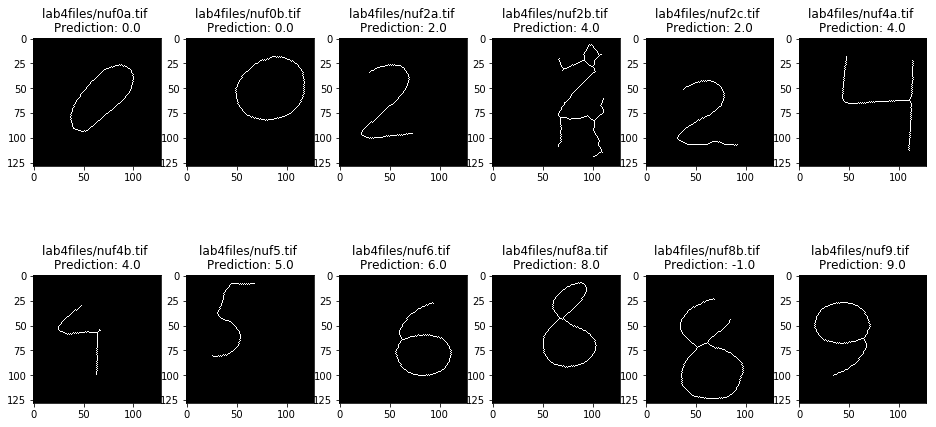

In [236]:
import glob
files = glob.glob("lab4files/nuf*.tif")
files_s = sorted(files)
show_fig = True

width = 2
height = int(math.ceil(len(files) / 2))
print(height)
plt.figure(figsize=(16,8))

for i, file in enumerate(files_s):
    im = np.array(Im.open(file))
    im_skel = tresh_skeletonize(im)
    ocr = eng.ocrdecide(im_skel, float(8))
    
    if show_fig:
        plt.subplot(width, height, i+1)
        plt.imshow(im_skel, cmap='gray')
        plt.title("{} \nPrediction: {}".format(file, ocr))
    
    print(file, " - ", ocr)

## Question 13
* Because **nuf2b** has a background almost the same color as the number
* Because **nuf8b** has a rather large gap in it's circle
